In [1]:
from manifold_learning import IMD, CCM
import numpy as np
from pydmd import DMD
from manifold_learning.utils import utils
from sklearn.decomposition import PCA
from pydmd.preprocessing import zero_mean_preprocessing
from pydmd.plotter import plot_summary
from manifold_learning.data.data_loader import load_csv_dataset,get_truncated_lorenz_rand
import matplotlib.pyplot as plt

In [3]:
X = load_csv_dataset("Jan1023_1_fr_ma2sec_sr30.csv").to_numpy()[:,1:]

In [4]:

centered_dmd = zero_mean_preprocessing(DMD(svd_rank=2,))
centered_dmd.fit(X)

/home/iaroslav/miniconda3/lib/python3.12/site-packages/pydmd/snapshots.py:73: UserWarning: Input data condition number 3206406089182494.0. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


/home/iaroslav/miniconda3/lib/python3.12/site-packages/pydmd/plotter.py:696: UserWarning: Provided DMD model has less than 3 modes.Plotting all available modes...
  warnings.warn(


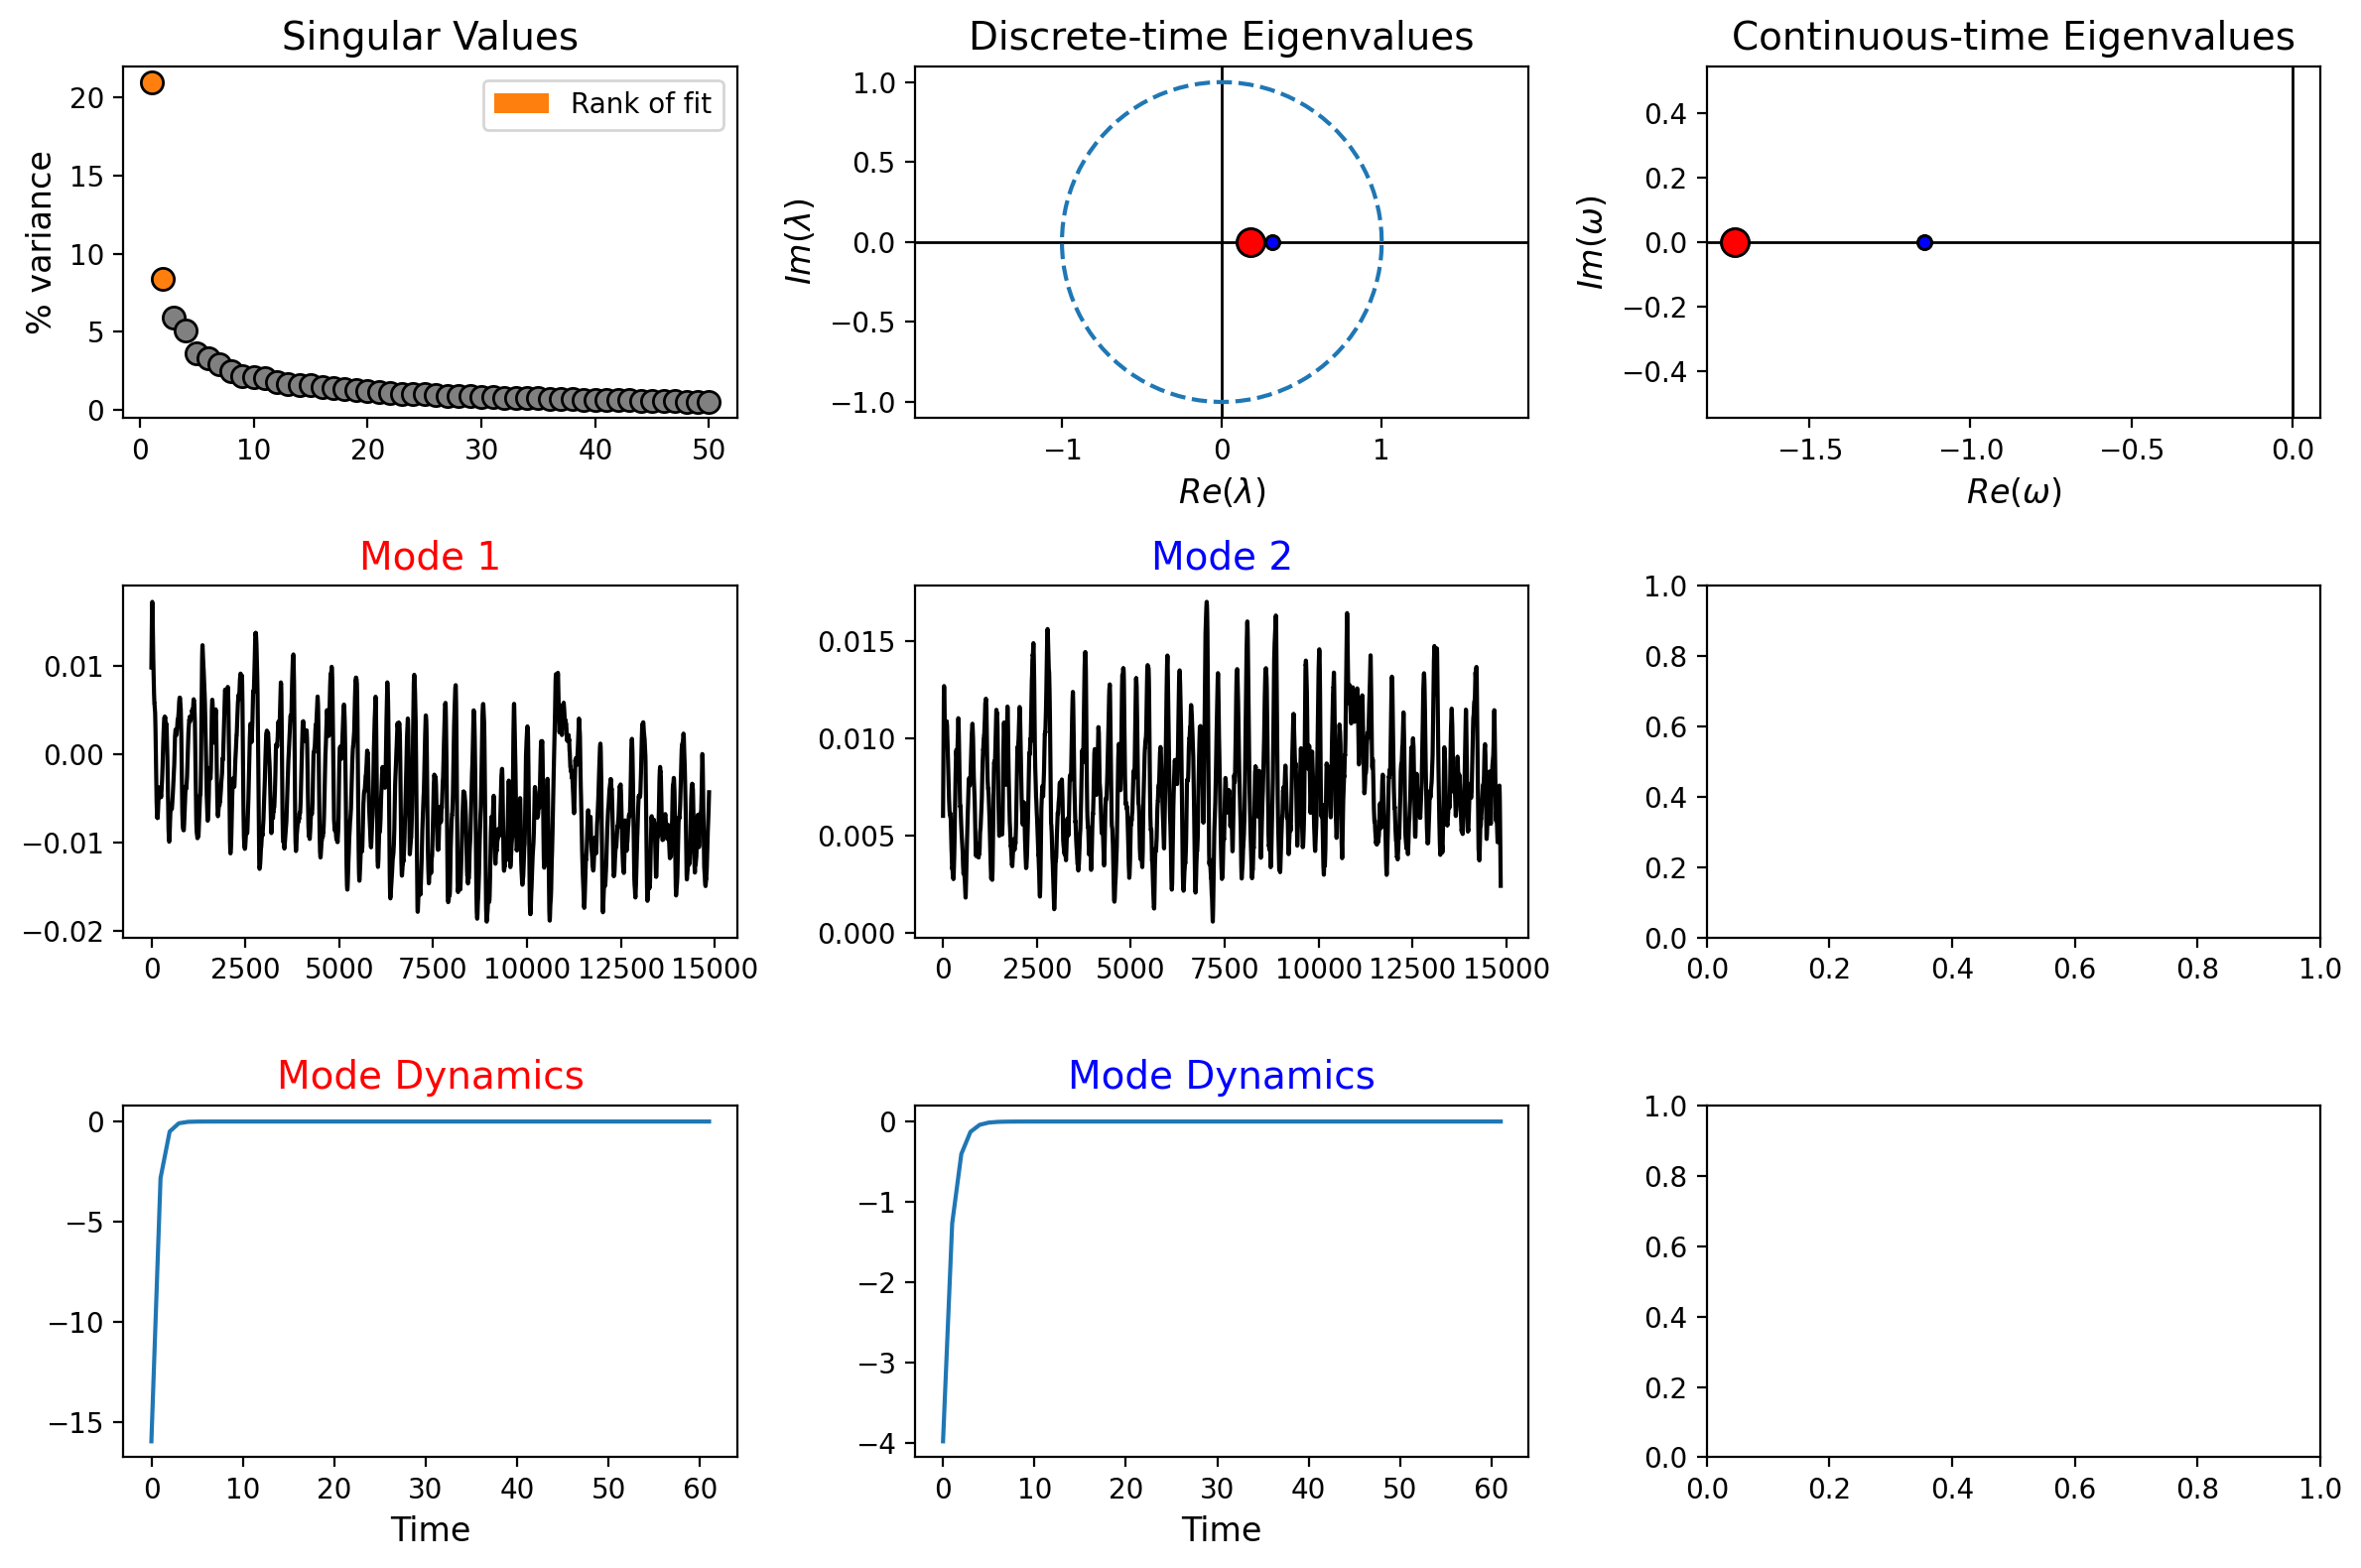

In [5]:

plot_summary(centered_dmd)

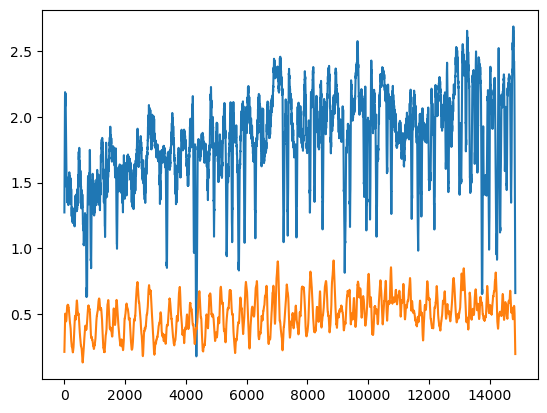

In [6]:
plt.plot(X[:,4])
plt.plot(centered_dmd.predict(X)[:,4])

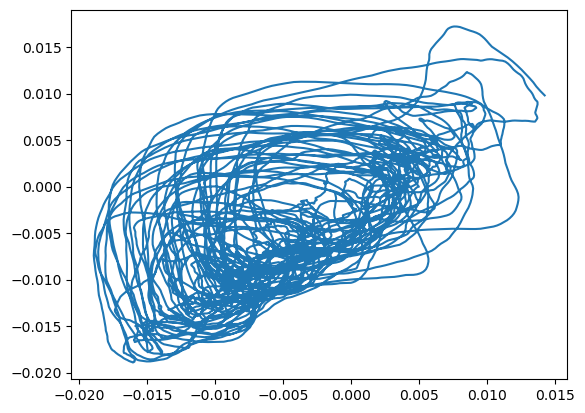

In [7]:
plt.plot(centered_dmd.modes[40:,1],centered_dmd.modes[:-40,1])

In [87]:
trainer = IMD.IMD_nD(X.shape[1], embed_dim=10, n_components=1,subtract_corr=True, device="cuda")

In [88]:
trainer.fit(X, sample_len=600, library_len=2200, 
            exclusion_rad=80, nbrs_num=20, tp=80, 
            epochs=1000, num_batches=32,optimizer="Adam", learning_rate=0.0001,tp_policy="fixed")


Epoch 1/1000, Loss: 0.6496
Epoch 2/1000, Loss: 0.6451
Epoch 3/1000, Loss: 0.6383
Epoch 4/1000, Loss: 0.6333
Epoch 5/1000, Loss: 0.6312
Epoch 6/1000, Loss: 0.6307
Epoch 7/1000, Loss: 0.6362
Epoch 8/1000, Loss: 0.6261
Epoch 9/1000, Loss: 0.6370
Epoch 10/1000, Loss: 0.6263
Epoch 11/1000, Loss: 0.6246
Epoch 12/1000, Loss: 0.6233
Epoch 13/1000, Loss: 0.6178
Epoch 14/1000, Loss: 0.6246
Epoch 15/1000, Loss: 0.6233
Epoch 16/1000, Loss: 0.6216
Epoch 17/1000, Loss: 0.6130
Epoch 18/1000, Loss: 0.6126
Epoch 19/1000, Loss: 0.6029
Epoch 20/1000, Loss: 0.6084
Epoch 21/1000, Loss: 0.6063
Epoch 22/1000, Loss: 0.6067
Epoch 23/1000, Loss: 0.5983
Epoch 24/1000, Loss: 0.6023
Epoch 25/1000, Loss: 0.6066
Epoch 26/1000, Loss: 0.6000
Epoch 27/1000, Loss: 0.5929
Epoch 28/1000, Loss: 0.5880
Epoch 29/1000, Loss: 0.5900
Epoch 30/1000, Loss: 0.5832
Epoch 31/1000, Loss: 0.5897
Epoch 32/1000, Loss: 0.5853
Epoch 33/1000, Loss: 0.5796
Epoch 34/1000, Loss: 0.5784
Epoch 35/1000, Loss: 0.5840
Epoch 36/1000, Loss: 0.5816
E

KeyboardInterrupt: 

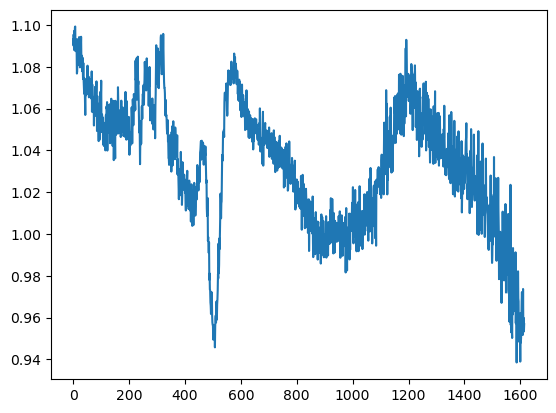

In [81]:
plt.plot(trainer.get_loss_history()[:])


In [89]:

unmixed = trainer.predict(X)

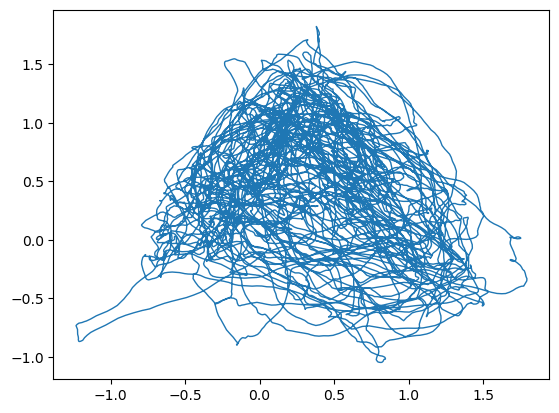

In [95]:
plt.plot(unmixed[:,0,2],unmixed[:,0,4],linewidth=1)

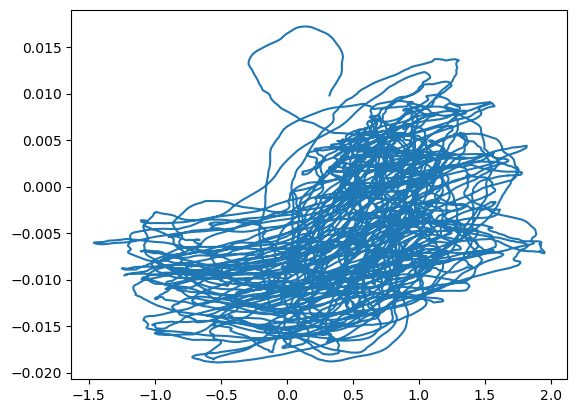

In [106]:
plt.plot(unmixed[:,0,0],centered_dmd.modes[:,1])

In [3]:
X = get_truncated_lorenz_rand(400,n_steps=20000)

In [4]:
def gaussian_kernel(x, y, sigma=1.0):
    return np.exp(-np.linalg.norm(x - y,axis=1)**2 / (2 * sigma**2))

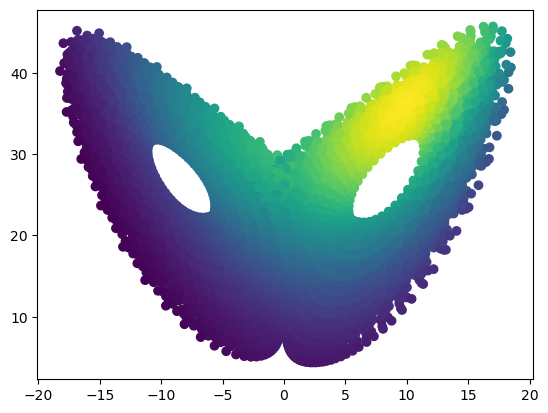

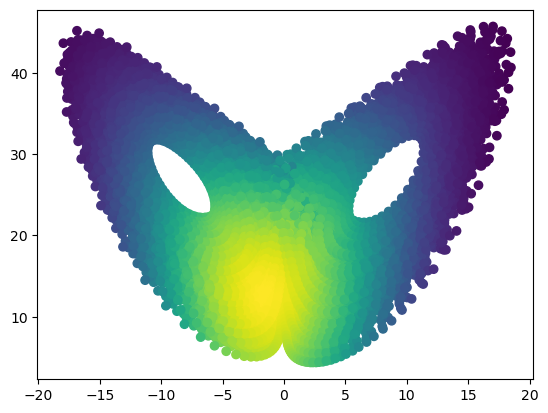

In [6]:
plt.scatter(X[:,0],X[:,2],c=gaussian_kernel(X,X[1100],sigma=15))
plt.show()
plt.scatter(X[:,0],X[:,2],c=gaussian_kernel(X,X[1800],sigma=15))
plt.show()

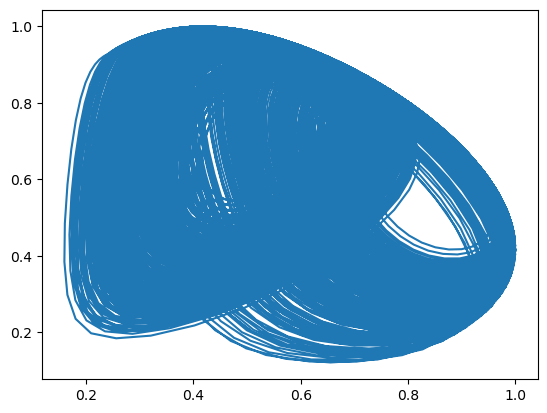

In [5]:
plt.plot(gaussian_kernel(X,X[1100],sigma=20),gaussian_kernel(X,X[1800],sigma=20))

In [189]:
exp_kernel_grid = np.array(np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),10), np.linspace(X[:,2].min(),X[:,2].max(),10))).reshape(2,-1).T

In [190]:
observables = np.array([gaussian_kernel(X[:,[0,2]],e,sigma=10) for e in exp_kernel_grid]).T

In [191]:
X_ = [get_truncated_lorenz_rand(400,n_steps=20000)[:,[0,2]] for i in range(5)]
observables = np.concatenate([np.array([gaussian_kernel(x,e,sigma=15) for e in exp_kernel_grid]) for x in X_]).T


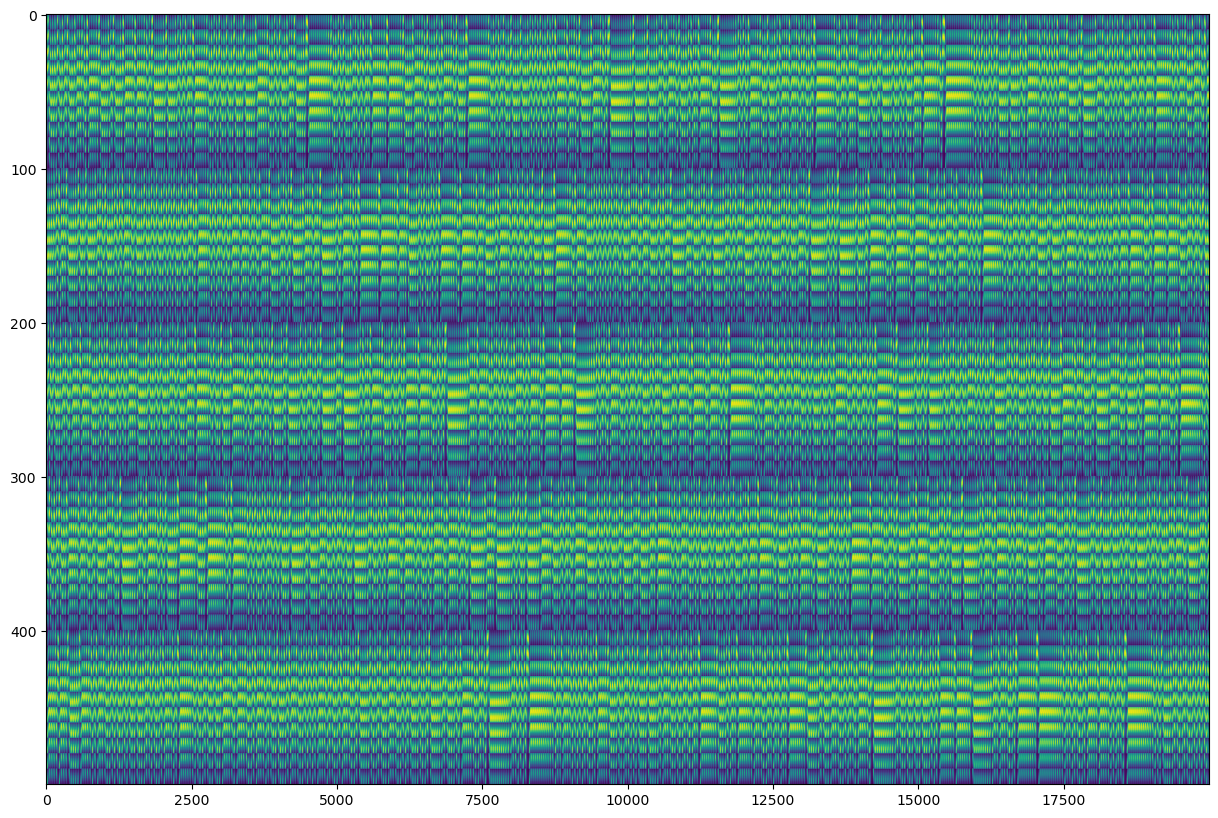

In [192]:
plt.figure(figsize=(15,10))
plt.imshow(observables.T,aspect="auto")

In [300]:
trainer = IMD.IMD_nD(observables.shape[1], embed_dim=3, n_components=5,subtract_corr=True, device="cuda")

In [307]:
trainer.fit(observables, sample_len=400, library_len=1200, 
            exclusion_rad=80, nbrs_num=50, tp=15, 
            epochs=1000, num_batches=128,optimizer="Adam", learning_rate=0.01,tp_policy="fixed")


Epoch 1/1000, Loss: 0.6647
Epoch 2/1000, Loss: 0.6637
Epoch 3/1000, Loss: 0.6605
Epoch 4/1000, Loss: 0.6591
Epoch 5/1000, Loss: 0.6572
Epoch 6/1000, Loss: 0.6568
Epoch 7/1000, Loss: 0.6540
Epoch 8/1000, Loss: 0.6546
Epoch 9/1000, Loss: 0.6521
Epoch 10/1000, Loss: 0.6541
Epoch 11/1000, Loss: 0.6504
Epoch 12/1000, Loss: 0.6542
Epoch 13/1000, Loss: 0.6504
Epoch 14/1000, Loss: 0.6514
Epoch 15/1000, Loss: 0.6516
Epoch 16/1000, Loss: 0.6499
Epoch 17/1000, Loss: 0.6531
Epoch 18/1000, Loss: 0.6517
Epoch 19/1000, Loss: 0.6526
Epoch 20/1000, Loss: 0.6530
Epoch 21/1000, Loss: 0.6557
Epoch 22/1000, Loss: 0.6556
Epoch 23/1000, Loss: 0.6546
Epoch 24/1000, Loss: 0.6585
Epoch 25/1000, Loss: 0.6605
Epoch 26/1000, Loss: 0.6632
Epoch 27/1000, Loss: 0.6649
Epoch 28/1000, Loss: 0.6669
Epoch 29/1000, Loss: 0.6728
Epoch 30/1000, Loss: 0.6735
Epoch 31/1000, Loss: 0.6758
Epoch 32/1000, Loss: 0.6808
Epoch 33/1000, Loss: 0.6843
Epoch 34/1000, Loss: 0.6887
Epoch 35/1000, Loss: 0.6913
Epoch 36/1000, Loss: 0.6937
E

KeyboardInterrupt: 

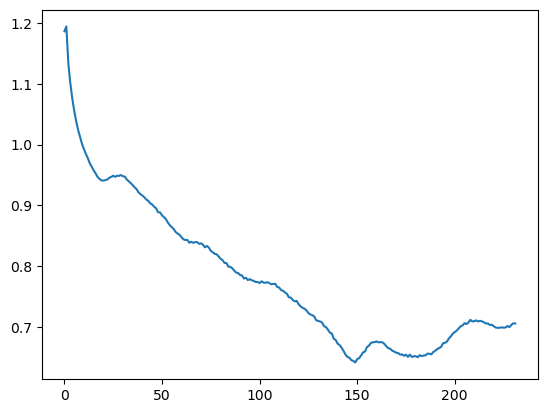

In [308]:
plt.plot(trainer.get_loss_history()[:])


In [309]:

unmixed = trainer.predict(observables)

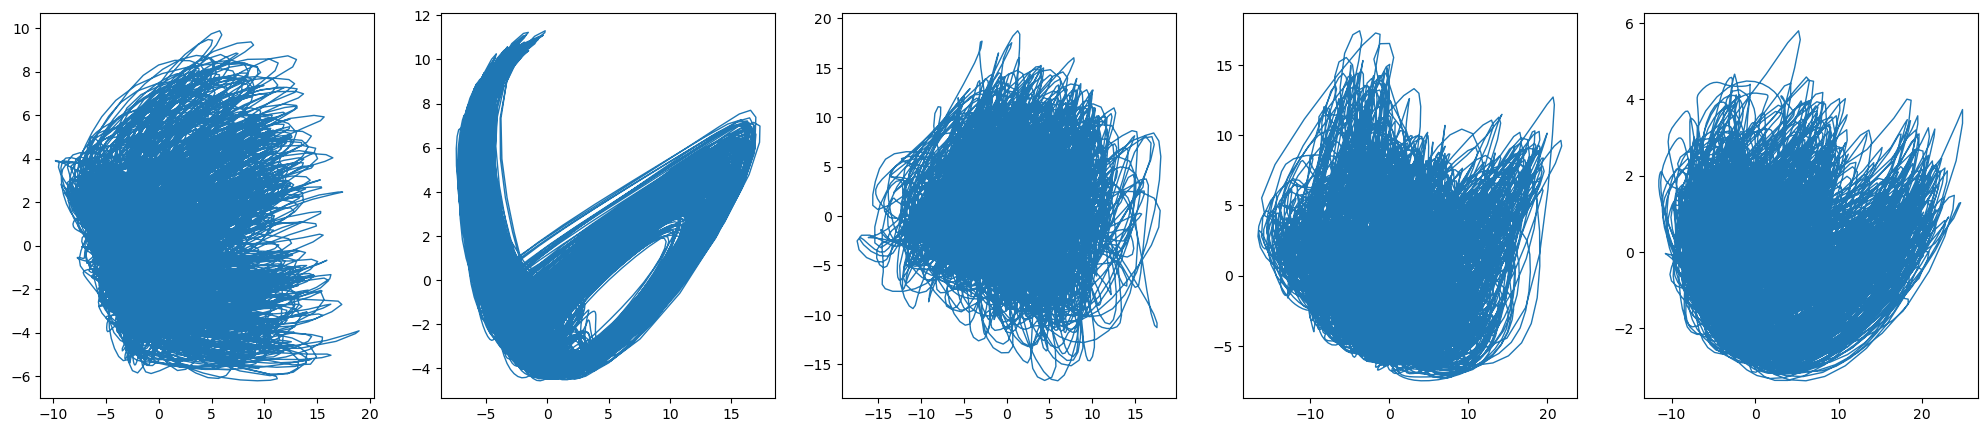

In [310]:
plt.figure(figsize=(5*unmixed.shape[1],5))
for i in range(unmixed.shape[1]):
    plt.subplot(1,unmixed.shape[1],i+1)
    x_pca = PCA(2).fit_transform(unmixed[:,i,:])
    plt.plot(x_pca[:,0],x_pca[:,1],linewidth=1)

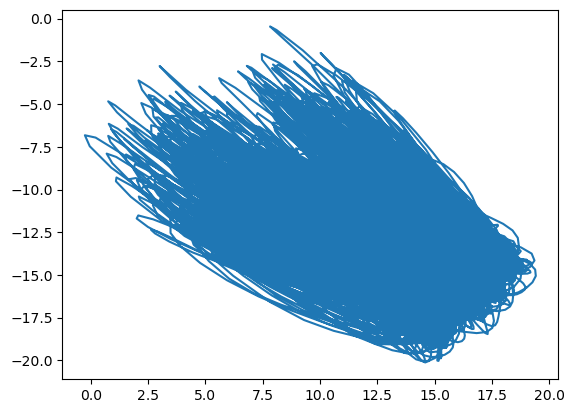

In [311]:
plt.plot(unmixed[:,0,0],unmixed[:,0,1])

In [312]:
import plotly.express as px
x_pca = PCA(3).fit_transform(unmixed[:,1,:])
fig = px.line_3d(x=x_pca[:,0], y=x_pca[:,1],z=x_pca[:,2],height=700)

fig.show()

In [217]:
plt.matshow(trainer.model.get_weights()[:,0,0].reshape(10,10))

ValueError: cannot reshape array of size 500 into shape (10,10)

In [281]:
dmd = DMD(svd_rank=100)
dmd.fit(observables.T)

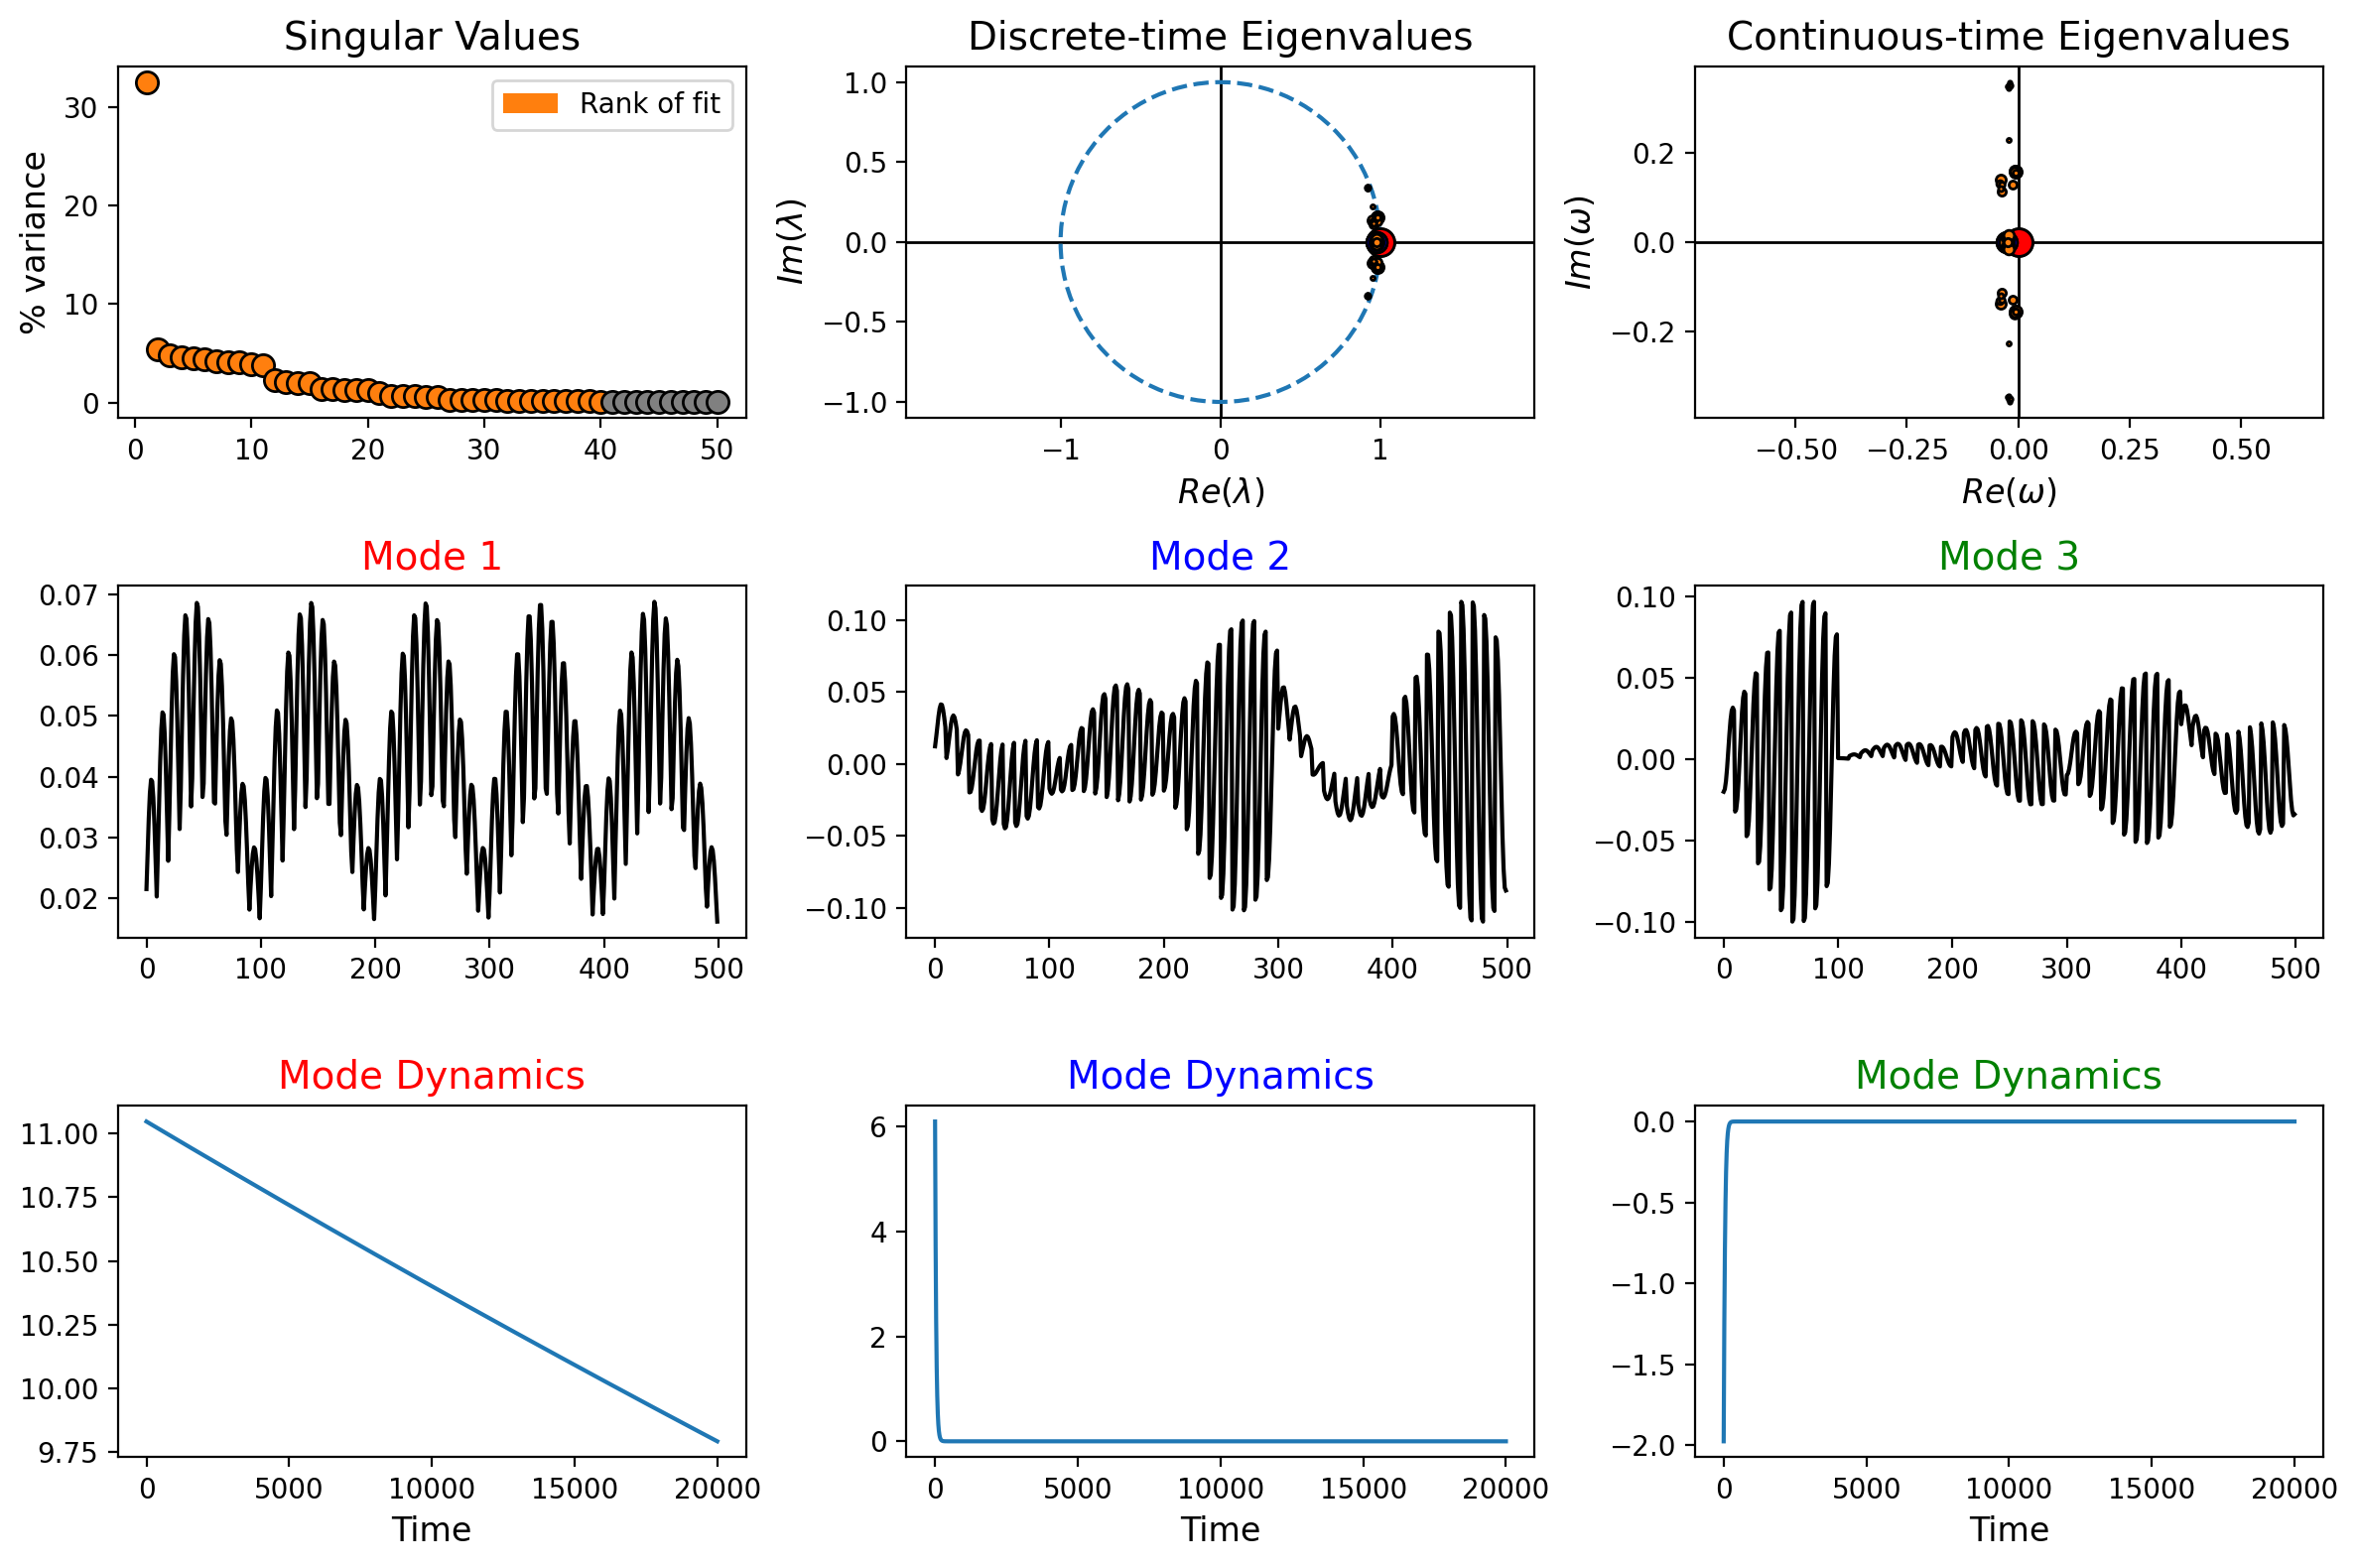

In [280]:

plot_summary(dmd)

In [ ]:
dmd.modes

/home/iaroslav/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning:

Casting complex values to real discards the imaginary part

/home/iaroslav/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



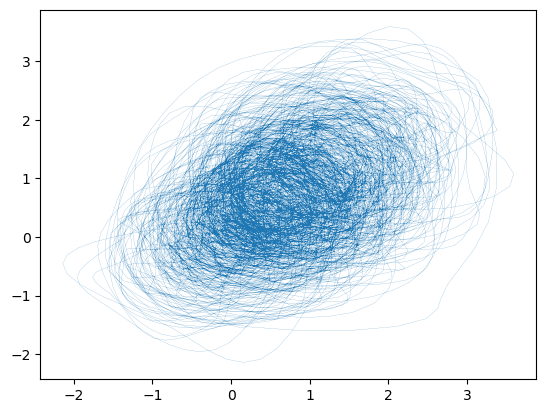

In [276]:
plt.plot((observables @ dmd.modes)[10:,2],(observables @ dmd.modes)[:-10,2],linewidth=0.1)